### The below notebook is done as a joint effort by "Kiran Rangwani" and "Yash Shrivastava" for the scope of CSCI-B565 Data Mining final project deliverables.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv("csv_result-Training Dataset.csv")

# EXPLORATORY DATA ANALYSIS

In [3]:
dataset.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


The describe method is used for calculating  statistical data like mean, std and percentile  of the numerical values of the data. It analyzes both numeric and object values.

In [4]:
dataset.describe()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the number of records in our data.

In [5]:
print(dataset.shape)

(11055, 32)


The information contains the number of columns, column labels, column data types, ,and non-null values.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

Checking if there are any missing values

In [7]:
dataset.isnull().sum()

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

Checking for duplicte values

In [8]:
duplicate_val=dataset.duplicated() 
print(duplicate_val.sum()) 
dataset[duplicate_val]

0


,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result


In [9]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

There are 0 categorical variables



Checking unique values of target variable

In [10]:
dataset['Result'].nunique()

2

view the unique values

In [11]:
dataset['Result'].unique()

array([-1,  1], dtype=int64)

counting the values

In [12]:
dataset['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

Scatter plot of 'favicon' vs 'Result'

<function matplotlib.pyplot.show(close=None, block=None)>

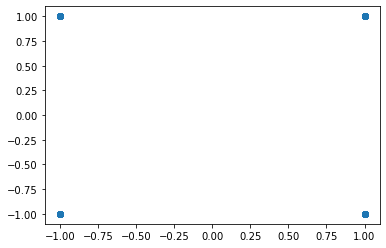

In [13]:
plt.scatter(dataset.Favicon,dataset.Result) 
plt.show

Scatter plot of 'URL_Length' vs 'web_traffic'

<function matplotlib.pyplot.show(close=None, block=None)>

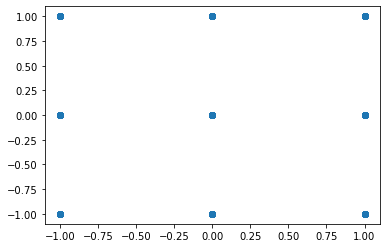

In [14]:
plt.scatter(dataset.URL_Length,dataset.web_traffic) 
plt.show

Frequency distribution of result and ssl_final_state

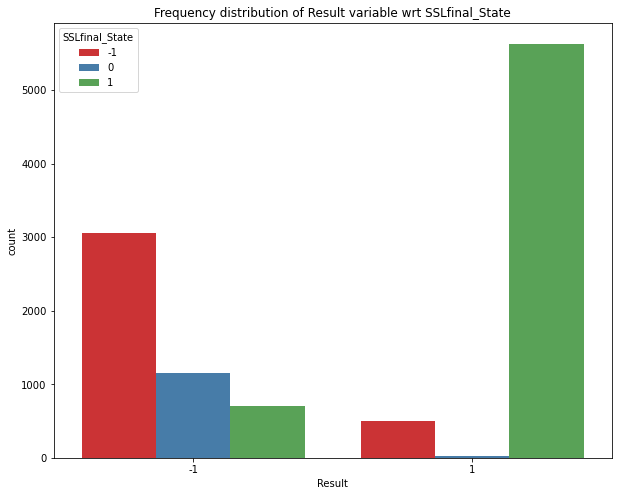

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Result", hue="SSLfinal_State", data=dataset, palette="Set1")
ax.set_title("Frequency distribution of Result variable wrt SSLfinal_State")
plt.show()

Frequency plot of 'favicon' attribute

<AxesSubplot:ylabel='Frequency'>

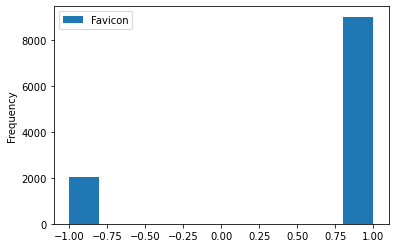

In [16]:
dataset.plot( x='Page_Rank', y='Favicon', kind='hist')

Frequency plot of 'SSLfinal_State' attribute

<AxesSubplot:ylabel='Frequency'>

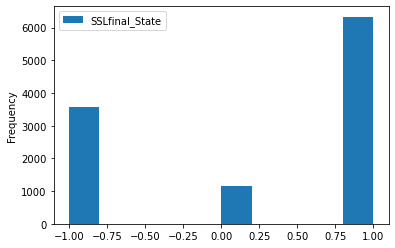

In [17]:
dataset.plot( x='Page_Rank', y='SSLfinal_State', kind='hist')

Frequency plot of 'Result' attribute

<AxesSubplot:ylabel='Frequency'>

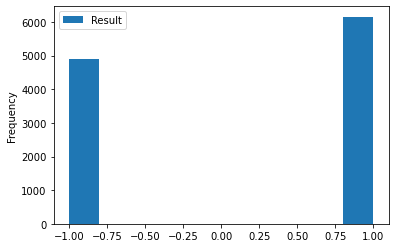

In [18]:
dataset.plot( x='Page_Rank', y='Result', kind='hist')

Correlation values computed for all attributes

In [19]:
dataset.corr()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
id,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


HEATMAP PLOTTED

<AxesSubplot:>

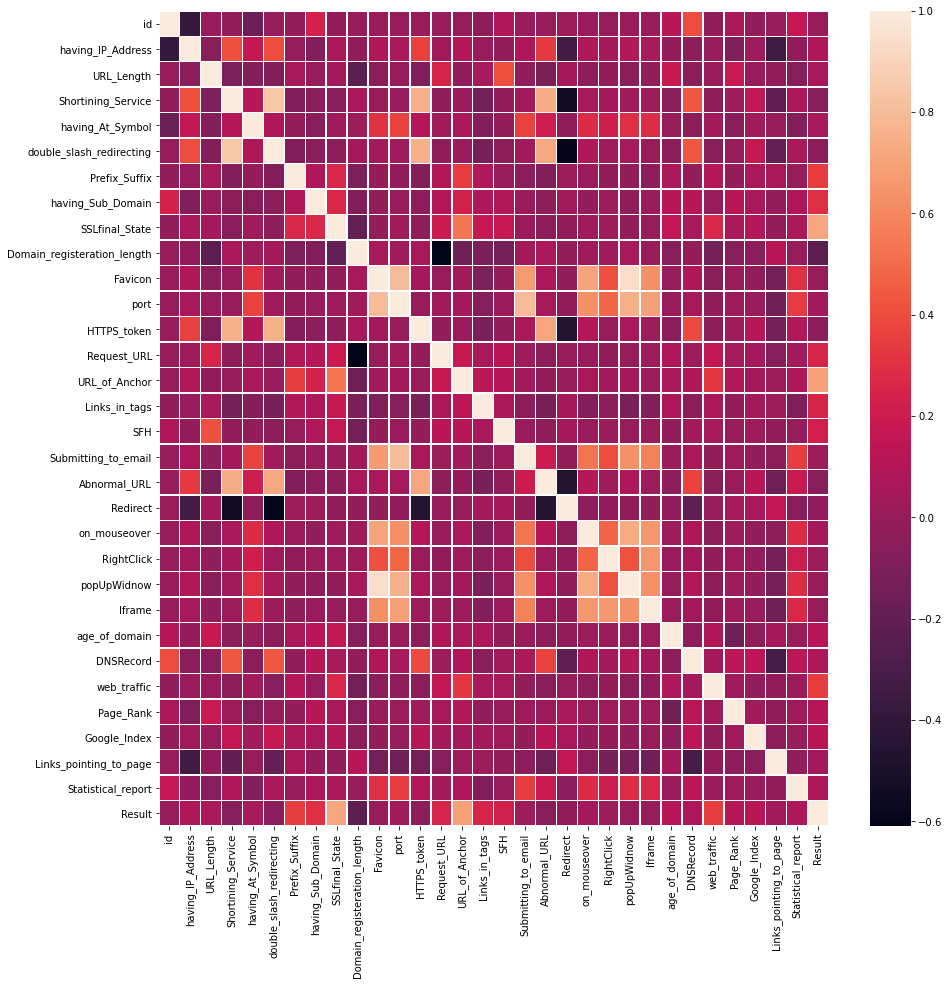

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(), linewidths=.5)

Distribution of values for web_traffic

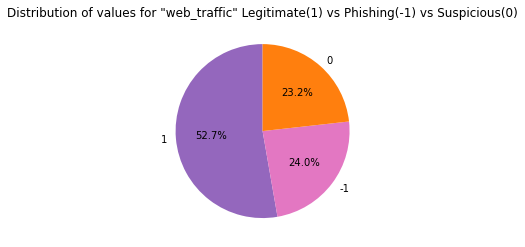

In [21]:
x=dataset['web_traffic'].value_counts()
colors = ['tab:purple', 'tab:pink','tab:orange']
plt.pie(x, labels=x.index, colors=colors,startangle=90,autopct='%.1f%%')
plt.title('Distribution of values for "web_traffic" Legitimate(1) vs Phishing(-1) vs Suspicious(0)')
plt.show()

Distribution of values for "Result"

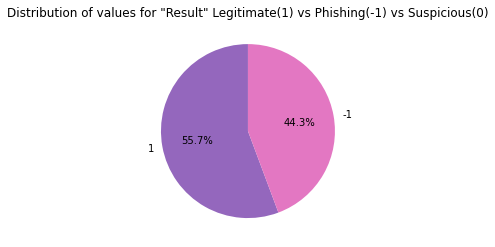

In [22]:
x=dataset['Result'].value_counts()
colors = ['tab:purple', 'tab:pink','tab:orange']
plt.pie(x, labels=x.index, colors=colors,startangle=90,autopct='%.1f%%')

plt.title('Distribution of values for "Result" Legitimate(1) vs Phishing(-1) vs Suspicious(0)')
plt.show()

Distribution of values for "Google_Index"

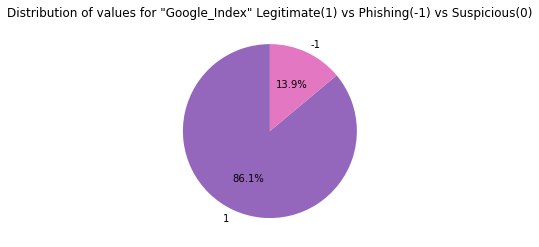

In [23]:
x=dataset['Google_Index'].value_counts()
colors = ['tab:purple', 'tab:pink','tab:orange']
plt.pie(x, labels=x.index, colors=colors,startangle=90,autopct='%.1f%%')

plt.title('Distribution of values for "Google_Index" Legitimate(1) vs Phishing(-1) vs Suspicious(0)')
plt.show()

Pearson's correlation of 'URL_Length' vs 'web_traffic'

In [24]:
list1 = dataset['URL_Length']
list2 = dataset['web_traffic']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.009


Heatmap for correlation of above attributes

<AxesSubplot:>

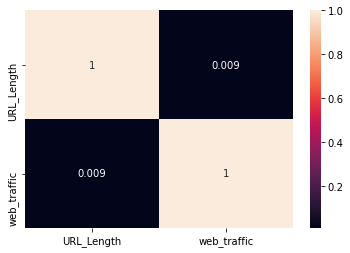

In [25]:
sns.heatmap(dataset[['URL_Length','web_traffic']].corr(), annot=True) 

Calculating and plotting correlation of multiple attributes for our analysis

In [26]:
dataset[['Page_Rank','Links_pointing_to_page']].corr()

,Page_Rank,Links_pointing_to_page
Page_Rank,1.000000,-0.028216
Links_pointing_to_page,-0.028216,1.000000


<AxesSubplot:>

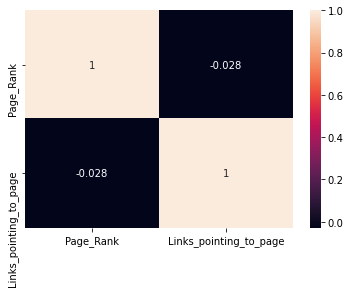

In [27]:
sns.heatmap(dataset[['Page_Rank','Links_pointing_to_page']].corr(), annot=True) 

In [28]:
dataset[['Page_Rank','web_traffic']].corr()

,Page_Rank,web_traffic
Page_Rank,1.000000,0.030984
web_traffic,0.030984,1.000000


<AxesSubplot:>

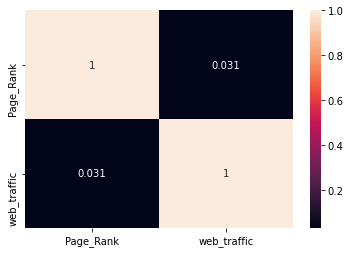

In [29]:
sns.heatmap(dataset[['Page_Rank','web_traffic']].corr(), annot=True) 

In [30]:
dataset[['popUpWidnow','Favicon']].corr()

,popUpWidnow,Favicon
popUpWidnow,1.000000,0.939633
Favicon,0.939633,1.000000


Visualizing the data into multiple plots

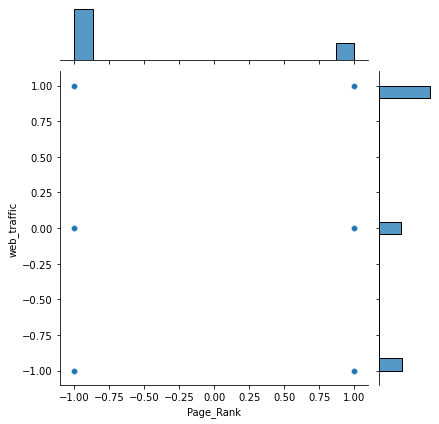

In [31]:
sns.jointplot(data = dataset, x = 'Page_Rank', y = 'web_traffic')

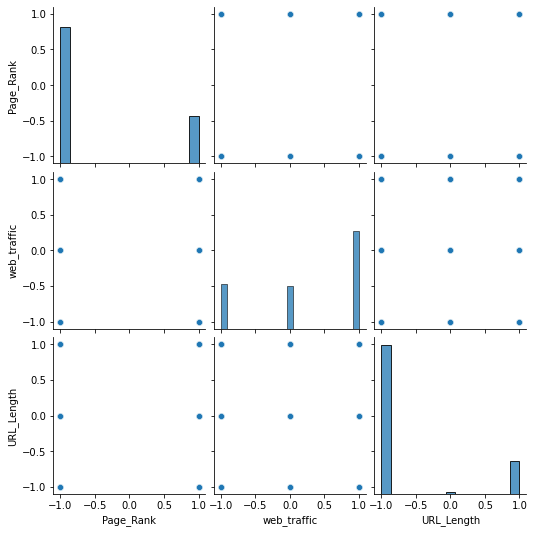

In [32]:
sns.pairplot(dataset[['Page_Rank', 'web_traffic', 'URL_Length']])

In [33]:
dataset.cov()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
id,1.018534e+07,-1176.749593,14.926904,-13.510403,-385.971594,-7.201375,-15.885833,610.758187,-19.447440,-3.545685,...,16.423014,4.662927,367.364212,1185.007961,-39.360051,181.899041,-27.681020,4.441288,363.021169,3.100054
having_IP_Address,-1.176750e+03,0.901614,-0.038125,0.258209,0.107532,0.253196,-0.003385,-0.062679,0.061836,-0.020331,...,0.072658,0.029955,-0.009900,-0.044618,0.002297,-0.076275,0.019166,-0.183496,-0.012596,0.088831
URL_Length,1.492690e+01,-0.038125,0.586902,-0.050541,-0.041061,-0.041766,0.028702,0.002503,0.034059,-0.160068,...,-0.029879,-0.006115,0.137206,-0.028967,0.005703,0.123059,0.001540,-0.010037,-0.035726,0.043712
Shortining_Service,-1.351040e+01,0.258209,-0.050541,0.454274,0.050235,0.381163,-0.036780,-0.023096,-0.037753,0.038665,...,0.019492,0.006446,-0.035385,0.272219,-0.026262,0.008608,0.072725,-0.076217,0.040000,-0.045513
having_At_Symbol,-3.859716e+02,0.107532,-0.041061,0.050235,0.509223,0.041639,-0.005674,-0.034405,0.020316,0.010430,...,0.163951,0.117061,-0.003917,-0.031640,0.019444,-0.040434,0.018311,-0.002473,-0.039821,0.037539
double_slash_redirecting,-7.201375e+00,0.253196,-0.041766,0.381163,0.041639,0.450256,-0.038947,-0.023631,-0.022150,0.029990,...,0.028864,0.004048,-0.033561,0.268120,-0.034641,-0.001840,0.082889,-0.074256,0.032800,-0.025739
Prefix_Suffix,-1.588583e+01,-0.003385,0.028702,-0.036780,-0.005674,-0.038947,0.459873,0.048726,0.161641,-0.061811,...,-0.007891,-0.014435,0.050169,-0.010399,0.062081,-0.004056,0.031825,0.026059,-0.001301,0.234876
having_Sub_Domain,6.107582e+02,-0.062679,0.002503,-0.023096,-0.034405,-0.023631,0.048726,0.668336,0.199529,-0.063769,...,-0.016344,0.005015,0.097314,0.095023,-0.003900,0.086390,0.032644,-0.004904,0.046341,0.242309
SSLfinal_State,-1.944744e+01,0.061836,0.034059,-0.037753,0.020316,-0.022150,0.161641,0.199529,0.831548,-0.166256,...,-0.009366,-0.001459,0.148193,0.043051,0.195319,0.059500,0.060644,-0.006086,0.040155,0.647556
Domain_registeration_length,-3.545685e+00,-0.020331,-0.160068,0.038665,0.010430,0.029990,-0.061811,-0.063769,-0.166256,0.886666,...,0.038234,0.002386,-0.059074,-0.009137,-0.104796,-0.049368,-0.025925,0.065835,-0.001446,-0.211236


# Implementation

In [34]:
# Data Preprocessing
dataset = dataset.drop(columns = ['id','Iframe','popUpWidnow','Abnormal_URL','port','double_slash_redirecting'])

In [35]:
# Divide the data into training and testing
response = dataset.iloc[:,25:]
attributes = dataset.iloc[:,:25]
standardized_input = StandardScaler().fit_transform(attributes)
standardized_output = StandardScaler().fit_transform(response)
standardized_output = preprocessing.LabelEncoder().fit_transform(standardized_output)
in_train,in_test,out_train,out_test=train_test_split(standardized_input,standardized_output,test_size=0.2,train_size=0.8)

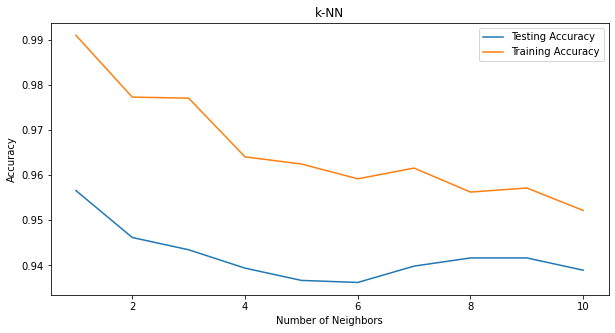

In [36]:
# Effect of number of neighbours in KNNN
neighbors = np.arange(1, 11)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors= k )

    knn.fit(in_train,out_train)
    
    train_accuracy[i] = knn.score(in_train,out_train)

    test_accuracy[i] = knn.score(in_test, out_test)

plt.figure(figsize=(10,5))
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [37]:
# Implementing KNN
knn = KNeighborsClassifier(n_neighbors=3).fit(in_train,out_train)
predictionTest = knn.predict(in_test)
predictionTrain = knn.predict(in_train)
print("Test Accuracy ",accuracy_score(out_test,predictionTest))
print("Train Accuracy ",accuracy_score(out_train,predictionTrain))
print(classification_report(out_test,predictionTest))

Test Accuracy  0.9434644957033017
Train Accuracy  0.9770465852555404
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       982
           1       0.94      0.96      0.95      1229

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



In [38]:
# Implementing Naive Bayes Classifier
bayes = GNB().fit(in_train,out_train)
predictionTest = bayes.predict(in_test)
predictionTrain = bayes.predict(in_train)
print("Test Accuracy ",accuracy_score(out_test,predictionTest))
print("Train Accuracy ",accuracy_score(out_train,predictionTrain))
print(classification_report(out_test,predictionTest))

Test Accuracy  0.6074174581637268
Train Accuracy  0.5956580732700135
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       982
           1       1.00      0.29      0.45      1229

    accuracy                           0.61      2211
   macro avg       0.77      0.65      0.57      2211
weighted avg       0.79      0.61      0.56      2211



In [39]:
# Implementing Decision Tree Classifier
DTC = tree.DecisionTreeClassifier(criterion = 'gini').fit(in_train, out_train)
predictionTest = DTC.predict(in_test)
predictionTrain = DTC.predict(in_train)
print("Test Accuracy ",accuracy_score(out_test,predictionTest))
print("Train Accuracy ",accuracy_score(out_train,predictionTrain))
print(classification_report(out_test,predictionTest))

Test Accuracy  0.9647218453188603
Train Accuracy  0.9902758932609679
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       982
           1       0.97      0.97      0.97      1229

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



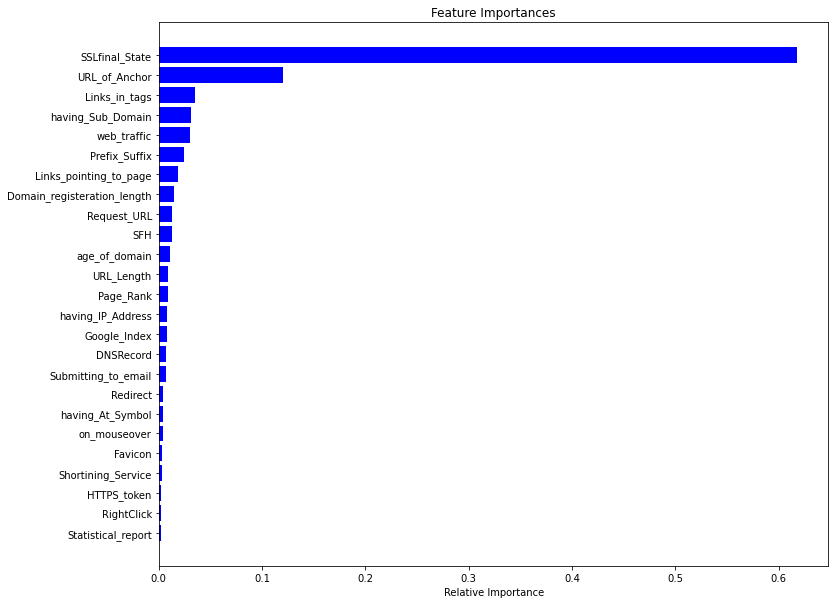

In [40]:
features = list(attributes.columns)
feat_imp = DTC.feature_importances_
indexes = np.argsort(feat_imp)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indexes)), feat_imp[indexes], color='blue', align='center')
plt.yticks(range(len(indexes)), [features[i] for i in indexes])
plt.xlabel('Relative Importance')
plt.show()

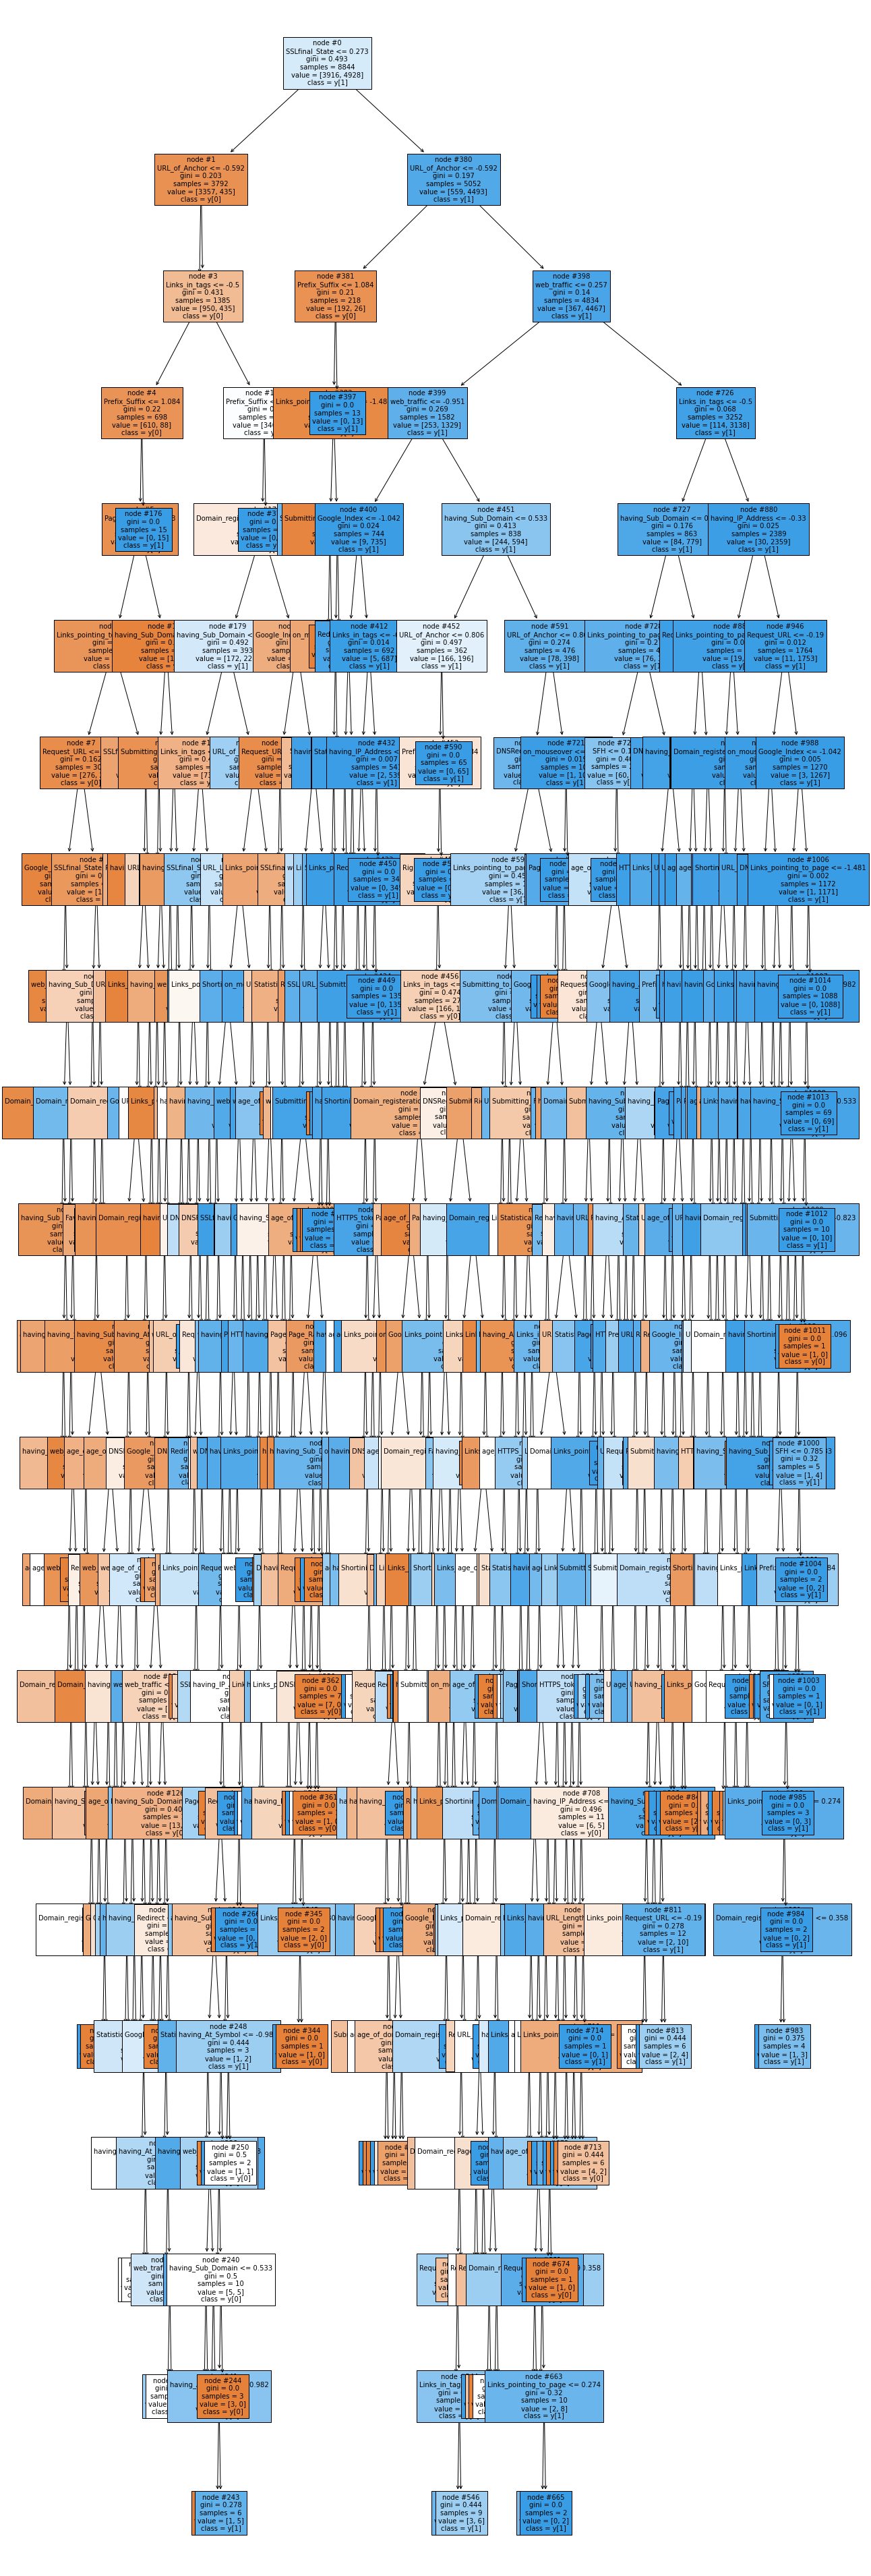

In [41]:
# Print Decision Tree
plt.figure(figsize=(20,70))
tree.plot_tree(DTC,feature_names=features,filled=True,fontsize=10,node_ids=True,class_names=True)
plt.show()

In [42]:
# Decision Tree in Text Format
print(tree.export_text(DTC,feature_names=features,show_weights=True))

|--- SSLfinal_State <= 0.27
|   |--- URL_of_Anchor <= -0.59
|   |   |--- weights: [2407.00, 0.00] class: 0
|   |--- URL_of_Anchor >  -0.59
|   |   |--- Links_in_tags <= -0.50
|   |   |   |--- Prefix_Suffix <= 1.08
|   |   |   |   |--- Page_Rank <= 0.55
|   |   |   |   |   |--- Links_pointing_to_page <= 0.27
|   |   |   |   |   |   |--- Request_URL <= -0.19
|   |   |   |   |   |   |   |--- Google_Index <= -1.04
|   |   |   |   |   |   |   |   |--- weights: [47.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Google_Index >  -1.04
|   |   |   |   |   |   |   |   |--- web_traffic <= 0.26
|   |   |   |   |   |   |   |   |   |--- having_Sub_Domain <= 0.53
|   |   |   |   |   |   |   |   |   |   |--- weights: [44.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- having_Sub_Domain >  0.53
|   |   |   |   |   |   |   |   |   |   |--- web_traffic <= -0.95
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- web_tr

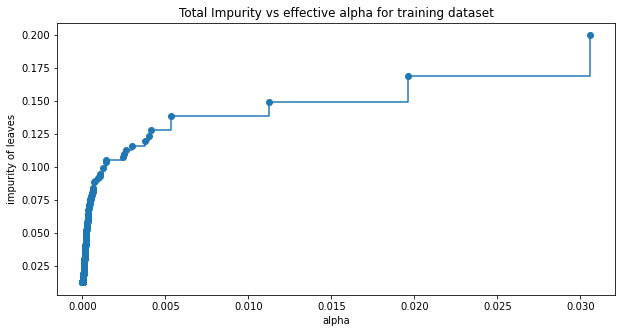

In [43]:
# Relation of alpha with impurities in Decision Tree
path = DTC.cost_complexity_pruning_path(in_train, out_train)
alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training dataset")
plt.show()

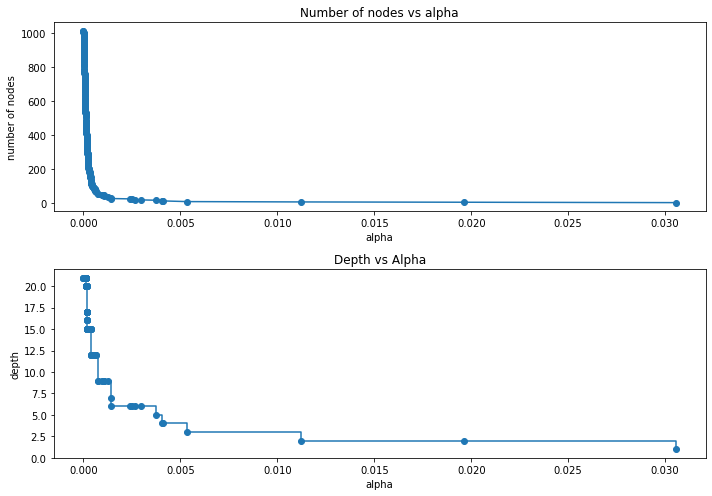

In [44]:
# Relation of alpha with depth and number of nodes
dec_tree = []
for alpha in alphas:
    classifier = tree.DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
    classifier.fit(in_train, out_train)
    dec_tree.append(classifier)
train_scores = [DTC.score(in_train, out_train) for clf in dec_tree]
test_scores = [DTC.score(in_test, out_test) for clf in dec_tree]

dec_tree = dec_tree[:-1]
alphas = alphas[:-1]

node_counts = [clf.tree_.node_count for clf in dec_tree]
depth = [clf.tree_.max_depth for clf in dec_tree]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(alphas, node_counts, marker='o')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

In [45]:
# Decision Tree with Hypertuning
estimator = tree.DecisionTreeClassifier(random_state=1)

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 10,15,20],
              'max_leaf_nodes' : [1,2, 5, 10],
              'min_impurity_decrease': [0.1,0.01,0.001]
             }

acc_scorer = make_scorer(recall_score)

grid_obj_dtc = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj_dtc = grid_obj_dtc.fit(in_train, out_train)

estimator = grid_obj_dtc.best_estimator_

estimator.fit(in_train, out_train)
predictionTest = estimator.predict(in_test)
predictionTrain = estimator.predict(in_train)
print("Test Accuracy ",accuracy_score(out_test,predictionTest))
print("Train Accuracy ",accuracy_score(out_train,predictionTrain))
print(classification_report(out_test,predictionTest))

Test Accuracy  0.903663500678426
Train Accuracy  0.9086386250565355
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       982
           1       0.87      0.97      0.92      1229

    accuracy                           0.90      2211
   macro avg       0.92      0.89      0.90      2211
weighted avg       0.91      0.90      0.90      2211



In [46]:
# Decision Tree with Bagging Classifier
dec_tree = tree.DecisionTreeClassifier(criterion="entropy",max_features="auto")
bagging = BaggingClassifier(base_estimator=dec_tree, 
                            n_estimators=20,
                            max_features=5,
                            max_samples=100,
                            random_state=1, 
                            n_jobs=5)
bagging.fit(in_train,out_train)
predictionTest = bagging.predict(in_test)
predictionTrain = bagging.predict(in_train)
print("Test Accuracy ",accuracy_score(out_test,predictionTest))
print("Train Accuracy ",accuracy_score(out_train,predictionTrain))
print(classification_report(out_test,predictionTest))

Test Accuracy  0.9127091813658977
Train Accuracy  0.911352329262777
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       982
           1       0.89      0.97      0.92      1229

    accuracy                           0.91      2211
   macro avg       0.92      0.91      0.91      2211
weighted avg       0.92      0.91      0.91      2211



In [47]:
# Implementing Random Forrest
forrest = RandomForestClassifier().fit(in_train,out_train)
predictionTest = forrest.predict(in_test)
predictionTrain = forrest.predict(in_train)
print("Test Accuracy ",accuracy_score(out_test,predictionTest))
print("Train Accuracy ",accuracy_score(out_train,predictionTrain))
print(classification_report(out_test,predictionTest))

Test Accuracy  0.9701492537313433
Train Accuracy  0.9902758932609679
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       982
           1       0.97      0.98      0.97      1229

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [48]:
# Random Forrest with Hypertuning
rf_estimator_weighted = RandomForestClassifier(random_state=1)
parameters = {
    "n_estimators": [50,100,150,200],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.1, 0.2, 0.5),
    "max_samples": np.arange(0.1, 0.5, 0.7),
}
acc_scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(in_train,out_train)

rf_estimator_weighted = grid_obj.best_estimator_

rf_estimator_weighted.fit(in_train,out_train)
predictionTest = rf_estimator_weighted.predict(in_test)
predictionTrain = rf_estimator_weighted.predict(in_train)
print("Test Accuracy ",accuracy_score(out_test,predictionTest))
print("Train Accuracy ",accuracy_score(out_train,predictionTrain))
print(classification_report(out_test,predictionTest))

Test Accuracy  0.9285391225689733
Train Accuracy  0.9353233830845771
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       982
           1       0.91      0.97      0.94      1229

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [49]:
models = [knn,bayes,DTC,grid_obj_dtc,bagging,forrest,rf_estimator_weighted]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models:
    pred_train = model.predict(in_train)
    pred_test = model.predict(in_test)
    train_acc = model.score(in_train,out_train)
    test_acc = model.score(in_test,out_test)
    train_recall = recall_score(out_train,pred_train)
    test_recall = recall_score(out_test,pred_test)
    train_precision = precision_score(out_train,pred_train)
    test_precision = precision_score(out_test,pred_test)
    acc_train.append(train_acc)
    acc_test.append(test_acc)
    recall_train.append(train_recall)
    recall_test.append(test_recall)
    precision_train.append(train_precision)
    precision_test.append(test_precision)

In [50]:
final_result = pd.DataFrame({'Model':['KNN','Bayes classifier with default parameters','Decision Tree Classifier',
                                        'Decision Tree classifier with best parameters','Decision Tree with Bagging Classifier', 'Random Forest with deafult parameters',
                                         'Random Forest Classifier with best parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})

final_result

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,KNN,0.977047,0.943464,0.982549,0.958503,0.976407,0.940895
1,Bayes classifier with default parameters,0.595658,0.607417,0.274351,0.293735,1.000000,1.000000
2,Decision Tree Classifier,0.990276,0.964722,0.990057,0.971522,0.992474,0.965238
3,Decision Tree classifier with best parameters,0.979505,0.973963,0.979505,0.973963,0.872244,0.868650
4,Decision Tree with Bagging Classifier,0.911352,0.912709,0.964692,0.968267,0.886279,0.885417
5,Random Forest with deafult parameters,0.990276,0.970149,0.994724,0.978845,0.987908,0.967820
6,Random Forest Classifier with best parameters,0.935323,0.928539,0.976461,0.971522,0.913440,0.906606
